In [3]:
import pandas as pd
import numpy as np

In [4]:
bicy = pd.read_csv('data/bicycle.csv', encoding='cp949')

#### 1. 데이터설명
2021년 1월 서울시 공공자전거 이용현황  
대여소명  
대여구분코드 - 일일회원/ 일일비회원/ 정기/ 단체  
성별 - F/M(1/0)
연령대코드 - AGE_001(~10대)/ 002(10대)/ 003(20대)/ 004(30대)/ 005(40대)/ 006(50대)/ 007(60대)/ 008(70대)  
이용건수  
운동량  
탄소량  
이동거리  
이용시간

In [5]:
bicy.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134


In [6]:
bicy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68731 entries, 0 to 68730
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여일자     68731 non-null  object 
 1   대여소번호    68731 non-null  int64  
 2   대여소명     68731 non-null  object 
 3   대여구분코드   68731 non-null  object 
 4   성별       59942 non-null  object 
 5   연령대코드    68731 non-null  object 
 6   이용건수     68731 non-null  int64  
 7   운동량      68731 non-null  object 
 8   탄소량      68731 non-null  object 
 9   이동거리(M)  68731 non-null  float64
 10  이용시간(분)  68731 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.8+ MB


In [7]:
bicy=bicy.rename(columns={'이동거리(M)':'이동거리','이용시간(분)':'이용시간'})


In [8]:
bicy.isnull().sum()

대여일자         0
대여소번호        0
대여소명         0
대여구분코드       0
성별        8789
연령대코드        0
이용건수         0
운동량          0
탄소량          0
이동거리         0
이용시간         0
dtype: int64

In [9]:
bicy.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134


In [10]:
# \N 으로 된 결측치 변경
bicy=bicy.replace('\\N',np.nan)

In [11]:
bicy.isnull().sum()

대여일자          0
대여소번호         0
대여소명          0
대여구분코드        0
성별        32068
연령대코드         0
이용건수          0
운동량         124
탄소량         124
이동거리          0
이용시간          0
dtype: int64

In [12]:
bicy['운동량']= bicy['운동량'].fillna(0)
bicy['탄소량']= bicy['탄소량'].fillna(0)

In [13]:
bicy.isnull().sum()

대여일자          0
대여소번호         0
대여소명          0
대여구분코드        0
성별        32068
연령대코드         0
이용건수          0
운동량           0
탄소량           0
이동거리          0
이용시간          0
dtype: int64

In [14]:
# 성별 f/m 처리
bicy= bicy.replace('f','1').replace('m','0').replace('F','1').replace('M','0')
bicy.성별.value_counts()

0    19936
1    16727
Name: 성별, dtype: int64

In [15]:
bicy.성별

0          0
1          0
2          0
3        NaN
4          0
        ... 
68726    NaN
68727    NaN
68728    NaN
68729      1
68730      0
Name: 성별, Length: 68731, dtype: object

In [16]:
# 연령대 
bicy =bicy.replace('AGE_001','1').replace('AGE_002','10').replace('AGE_003','20').replace('AGE_004','30').replace('AGE_005','40').replace('AGE_006','50').replace('AGE_007','60').replace('AGE_008','70')

In [17]:
bicy.연령대코드.value_counts()

10    15581
20    13515
30    12363
40     9384
1      7833
50     5078
70     3544
60     1433
Name: 연령대코드, dtype: int64

In [18]:
# 대여구분코드
bicy = bicy.replace('일일(회원)','일일회원').replace('일일(비회원)','일일비회원').replace('BIL_021',np.nan)

In [19]:
bicy.대여구분코드.value_counts()

정기       38981
일일회원     25762
단체        2378
일일비회원     1162
Name: 대여구분코드, dtype: int64

In [20]:
bicy.describe(include='object')

,대여일자,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량
count,68731,68731,68283,36663,68731,68731,68731
unique,1,2056,4,2,8,51237,5204
top,2021-01,583. 청계천 생태교실 앞,정기,0,10,0.00,0.00
freq,68731,64,38981,19936,15581,1791,1813


#### 2. 데이터타입 변환

In [21]:
bicy.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2021-01,3,중랑센터,일일회원,0,20,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,0,20,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,0,30,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일회원,NaN,30,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일회원,0,30,6,371.10,3.39,14642.60,134


In [22]:
bicy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68731 entries, 0 to 68730
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여일자    68731 non-null  object 
 1   대여소번호   68731 non-null  int64  
 2   대여소명    68731 non-null  object 
 3   대여구분코드  68283 non-null  object 
 4   성별      36663 non-null  object 
 5   연령대코드   68731 non-null  object 
 6   이용건수    68731 non-null  int64  
 7   운동량     68731 non-null  object 
 8   탄소량     68731 non-null  object 
 9   이동거리    68731 non-null  float64
 10  이용시간    68731 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.8+ MB


In [23]:
bicy['대여소번호']= bicy['대여소번호'].astype('category')
bicy['대여소명']= bicy['대여소명'].astype('category')
bicy['성별']= bicy['성별'].astype('category')
bicy['연령대코드']=bicy['연령대코드'].astype('category')

In [24]:
bicy['운동량']= bicy['운동량'].astype(np.float64)
bicy['탄소량']= bicy['탄소량'].astype(np.float64)

In [25]:
bicy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68731 entries, 0 to 68730
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   대여일자    68731 non-null  object  
 1   대여소번호   68731 non-null  category
 2   대여소명    68731 non-null  category
 3   대여구분코드  68283 non-null  object  
 4   성별      36663 non-null  category
 5   연령대코드   68731 non-null  category
 6   이용건수    68731 non-null  int64   
 7   운동량     68731 non-null  float64 
 8   탄소량     68731 non-null  float64 
 9   이동거리    68731 non-null  float64 
 10  이용시간    68731 non-null  int64   
dtypes: category(4), float64(3), int64(2), object(2)
memory usage: 4.2+ MB


In [26]:
print(3.5/5.8 *100)    # 메모리 60%로 감소

60.3448275862069


### 3. 데이터 분석

In [27]:
bicy.describe().T

,count,mean,std,min,25%,50%,75%,max
이용건수,68731.0,11.532002,19.273029,1.0,2.00,4.00,13.000,361.00
운동량,68731.0,860.399826,1487.773546,0.0,109.31,346.67,974.740,49507.93
탄소량,68731.0,7.432609,12.677879,0.0,0.98,3.08,8.550,457.92
이동거리,68731.0,32037.415714,54645.976360,0.0,4229.06,13260.39,36842.335,1974164.35
이용시간,68731.0,296.821260,484.693005,0.0,46.00,128.00,342.000,18097.00


In [28]:
# 한글 깨짐 현상을 해결하지 못해서 칼럼이름을 영어로 변경 

bicy = bicy.rename(columns={'대여일자':'date','대여소번호':'rental.No','대여소명':'rental','대여구분코드':'Rcate','성별':'sex','연령대코드':'age','이용건수':'useN','운동량':'exer','탄소량':'carbon','이동거리':'distance','이용시간':'Huse'})
bicy.head()

,date,rental.No,rental,Rcate,sex,age,useN,exer,carbon,distance,Huse
0,2021-01,3,중랑센터,일일회원,0,20,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,0,20,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,0,30,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일회원,NaN,30,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일회원,0,30,6,371.10,3.39,14642.60,134


In [29]:
# 평균 이동거리가 긴 대여소

bicy.groupby(['rental'])['distance'].mean(
).reset_index().sort_values(by='distance', ascending=False).head()

,rental,distance
818,207. 여의나루역 1번출구 앞,214957.997903
1685,502. 뚝섬유원지역 1번출구 앞,200866.122203
1737,565. 옥수역 3번출구,199626.209153
447,152. 마포구민체육센터 앞,166088.996000
843,2102. 봉림교 교통섬,162260.832586


In [30]:
# 평균 이용시간이 많은 상위 대여소
topH=bicy.groupby(['rental'])['Huse'].mean(
).reset_index().sort_values(by='Huse', ascending=False).head()
topH

,rental,Huse
818,207. 여의나루역 1번출구 앞,1955.919355
1685,502. 뚝섬유원지역 1번출구 앞,1734.135593
447,152. 마포구민체육센터 앞,1426.283333
1737,565. 옥수역 3번출구,1414.423729
843,2102. 봉림교 교통섬,1344.017241


In [31]:
# 평균 이용시간이 적은 상위 대여소
bicy.groupby(['rental'])['Huse'].mean(
).reset_index().sort_values(by='Huse', ascending=True).head()

,rental,Huse
1345,2918.골마을 근린공원,8.000000
1091,2393. 구룡사 앞 교차로 (보도육교),24.823529
1169,2536.서초종합체육관 입구,30.200000
1172,2539.대한무역투자진흥공사 KOTRA 앞,33.000000
1093,2395. 개포1단지아파트 입구 (보도육교),36.600000


### 4. 시각화

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')



In [33]:
bicy.columns

Index(['date', 'rental.No', 'rental', 'Rcate', 'sex', 'age', 'useN', 'exer',
       'carbon', 'distance', 'Huse'],
      dtype='object')

In [34]:
cor = bicy[['rental','Rcate','sex','age','useN','exer','carbon','distance','Huse']]

In [35]:
cor = cor.corr()
print(cor)

mask = np.array(cor)
mask[np.tril_indices_from(mask)]= False

              useN      exer    carbon  distance      Huse
useN      1.000000  0.823506  0.821539  0.821540  0.862957
exer      0.823506  1.000000  0.991923  0.991924  0.931951
carbon    0.821539  0.991923  1.000000  1.000000  0.940628
distance  0.821540  0.991924  1.000000  1.000000  0.940629
Huse      0.862957  0.931951  0.940628  0.940629  1.000000


<AxesSubplot:>

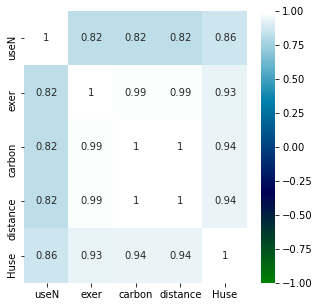

In [36]:
# 상관관계 분석

plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(bicy.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'ocean', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

#### 나이대별 이용건수 비교  
10대, 20대 ,30대 순으로 가장 높다

<AxesSubplot:xlabel='age', ylabel='useN'>

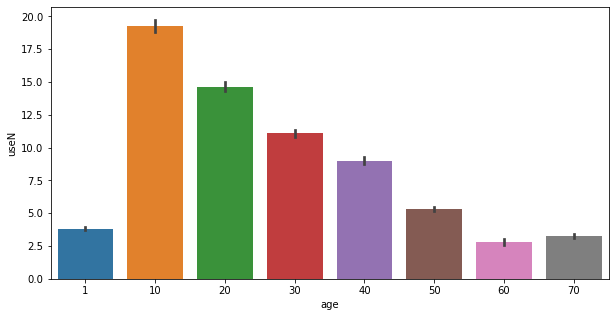

In [37]:
# 나이대별 이용건수 비교
fig, ax = plt.subplots(figsize = (10,5))
age_use = bicy.groupby(['age'])['useN'].mean().sort_values(ascending=False)
sns.barplot(x='age',y='useN', ax=ax, data=bicy)

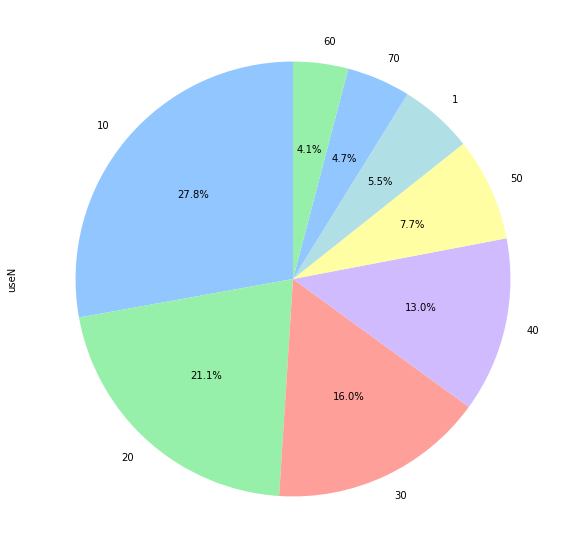

In [38]:
plt.style.use( 'seaborn-pastel')
age_use.plot( kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.show()

#### 성별 이용률
비교적 남자의 자전거 이용률이 높은 것 알 수 있다.

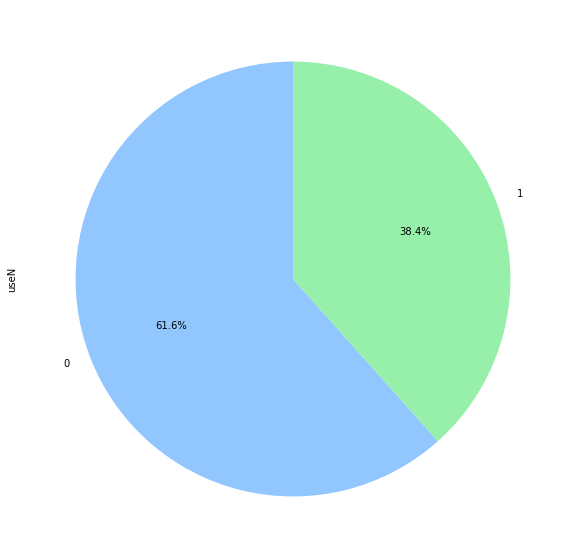

In [39]:
# 성별 이용건수
plt.style.use( 'seaborn-pastel')
sex_use= bicy.groupby(['sex'])['useN'].mean().sort_values(ascending=False)
sex_use.plot( kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.show()

Text(0, 0.5, 'useN')

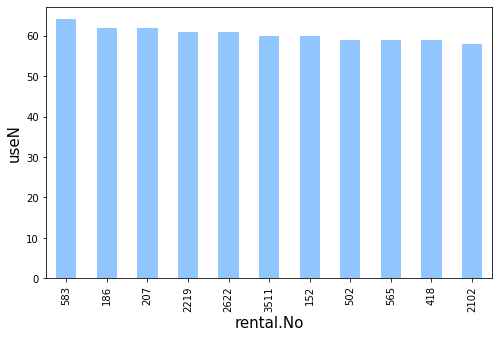

In [44]:
# 대여소별 이용건수
plt.style.use( 'seaborn-pastel' )
top_r = bicy['rental.No'].value_counts(sort=True)
top_r[:11].plot(kind='bar', figsize=(8,5))
plt.xlabel('rental.No', fontsize=15)
plt.ylabel('useN', fontsize=15)        # 상위 10개의 대여소는 이용건수가 60개 정도로 비슷

#### 회원구분별로 이용시간 비교
가장 오랜시간을 타는 그룹은 정기권회원이다. 다음은 일일회원 ,단체, 일일비회원 순으로 이용시간이 길다.

<AxesSubplot:xlabel='Rcate'>

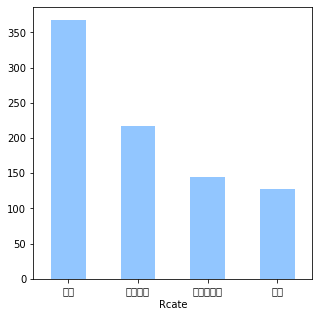

In [41]:
# 대여구분코드별로 이용시간 비교
plt.style.use( 'seaborn-pastel')
cate_H = bicy.groupby(['Rcate'])['Huse'].mean().sort_values(ascending=False)
cate_H.plot(kind='bar',rot=0)

#### 운동량과 탄소량 비교
운동량과 탄소량은 높은 상관관계를 갖는다.

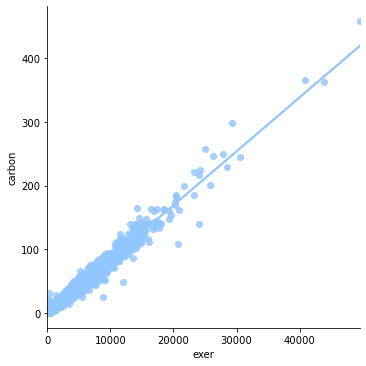

In [42]:
sns.lmplot(x='exer',y='carbon', data=bicy)
plt.show()

운동량과 탄소량은 비례하고 이용건수가 가장 많았던 10대가 눈에 가장 많이 뛴다.

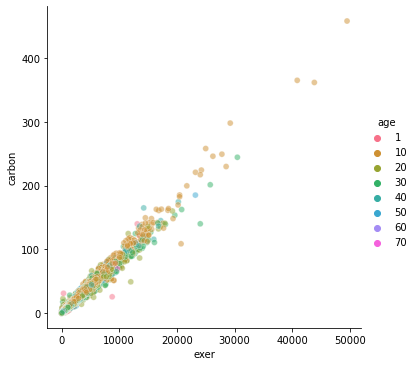

In [43]:
sns.relplot(
    x='exer',
    y='carbon',
    data=bicy,
    hue='age', # 색상을 회원구분에 대해서 바꾸기
    alpha=.5, # 투명도
    height=5  # 크기
)

### 5. 의미 도출

1. 평균 이동거리가 긴 대여소  
여의나루역 1번출구 앞, 뚝섬유원지역 1번출구 앞,옥수역 3번출구,마포구민체육센터 앞,봉림교 교통섬
  평균 이용시간이 많은 상위 대여소  
여의나루역 1번출구 앞, 뚝섬유원지역 1번출구 앞,마포구민체육센터 앞,옥수역 3번출구,봉림교 교통섬  
-> 이동거리와 이용시간이 긴 대여소 top5가 같다.  

2. 공공자건거 연령대 별 이용수  
10대 - 20대 - 30대 - 40대 - 50대- 10대 미만 - 70대 이상 - 60대 순  

3. 성별 이용수 비교하여 남자가 61%로 이용률 높다.  
  
4. 대여구분코드별로 이용시간 비교  
정기권회원 - 일일회원 - 단체 - 일일비회원 순으로 이용시간이 길다.  

5. 운동량과 탄소량은 높은 상관관계를 가지고 비례한다.  

공공자건거의 이용현황을 분석하여 더욱 이용률을 높일 수 있는 방안을 찾을 수 있다고 생각했습니다.  
가장 이용거리와, 이용시간이 긴 여의나루역과 뚝섬유원지에 자건거를 늘릴 수 있고  
20,30대, 여성의 이용률을 높일 수 있는 방법을 찾을 수 있다고 생각했습니다.
